In [8]:
import sys
!{sys.executable} -m pip install numpy pandas tensorflow scikit-learn nltk matplotlib

     ---------------------------------------- 0.0/52.8 kB ? eta -:--:--
     ------------------------------- -------- 41.0/52.8 kB 1.9 MB/s eta 0:00:01
     ------------------------------- -------- 41.0/52.8 kB 1.9 MB/s eta 0:00:01
     -------------------------------------- 52.8/52.8 kB 546.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/116.4 kB ? eta -:--:--
     ------------- ----------------------- 41.0/116.4 kB 991.0 kB/s eta 0:00:01
     ------------------------------------ - 112.6/116.4 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 116.4/116.4 kB 974.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.1 MB 5.1 MB/s eta 0:00:02
   - -------------------------------------- 0.2/8.1 MB 2.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/8.1 MB 2.9 MB/s eta 0:00:03
   -- ------------------------------------- 0.5/8.1 MB 2.6 MB/s eta 0:00:04
  


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\axelv\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [3]:
path = r"..\News_Category_Dataset_v3.json"

df = pd.read_json(path, lines=True)
df.head()

print(df[['headline', 'category']])


                                                 headline   category
0       Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS
1       American Airlines Flyer Charged, Banned For Li...  U.S. NEWS
2       23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY
3       The Funniest Tweets From Parents This Week (Se...  PARENTING
4       Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS
...                                                   ...        ...
209522  RIM CEO Thorsten Heins' 'Significant' Plans Fo...       TECH
209523  Maria Sharapova Stunned By Victoria Azarenka I...     SPORTS
209524  Giants Over Patriots, Jets Over Colts Among  M...     SPORTS
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...     SPORTS
209526  Dwight Howard Rips Teammates After Magic Loss ...     SPORTS

[209527 rows x 2 columns]


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

def text_preprocess(text):
    text = text.lower()                            # 1. lowercase
    text = re.sub(r'http\S+', '', text)            # 2. remove url
    text = re.sub(r'[^a-z\s]', '', text)           # 3. remove punctuation & numbers
    tokens = text.split()                          # 4. tokenization
    tokens = [w for w in tokens if w not in stop_words]  # 5. remove stopwords
    tokens = [lemm.lemmatize(w) for w in tokens]   # 6. lemmatization
    return " ".join(tokens)

def csv_preprocess(df):
    df = df.drop_duplicates(subset='headline', keep='first')
    df = df.dropna()
    df = df.reset_index(drop=True)
        
    return df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Risya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Risya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:

pd.set_option('display.max_colwidth', None)
df['cleaned_headline'] = df['headline'].apply(text_preprocess)
df = csv_preprocess(df)
df[['headline', 'cleaned_headline', 'category']].head()

,headline,cleaned_headline,category
0,Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters,million american roll sleeve omicrontargeted covid booster,U.S. NEWS
1,"American Airlines Flyer Charged, Banned For Life After Punching Flight Attendant On Video",american airline flyer charged banned life punching flight attendant video,U.S. NEWS
2,23 Of The Funniest Tweets About Cats And Dogs This Week (Sept. 17-23),funniest tweet cat dog week sept,COMEDY
3,The Funniest Tweets From Parents This Week (Sept. 17-23),funniest tweet parent week sept,PARENTING
4,Woman Who Called Cops On Black Bird-Watcher Loses Lawsuit Against Ex-Employer,woman called cop black birdwatcher loses lawsuit exemployer,U.S. NEWS


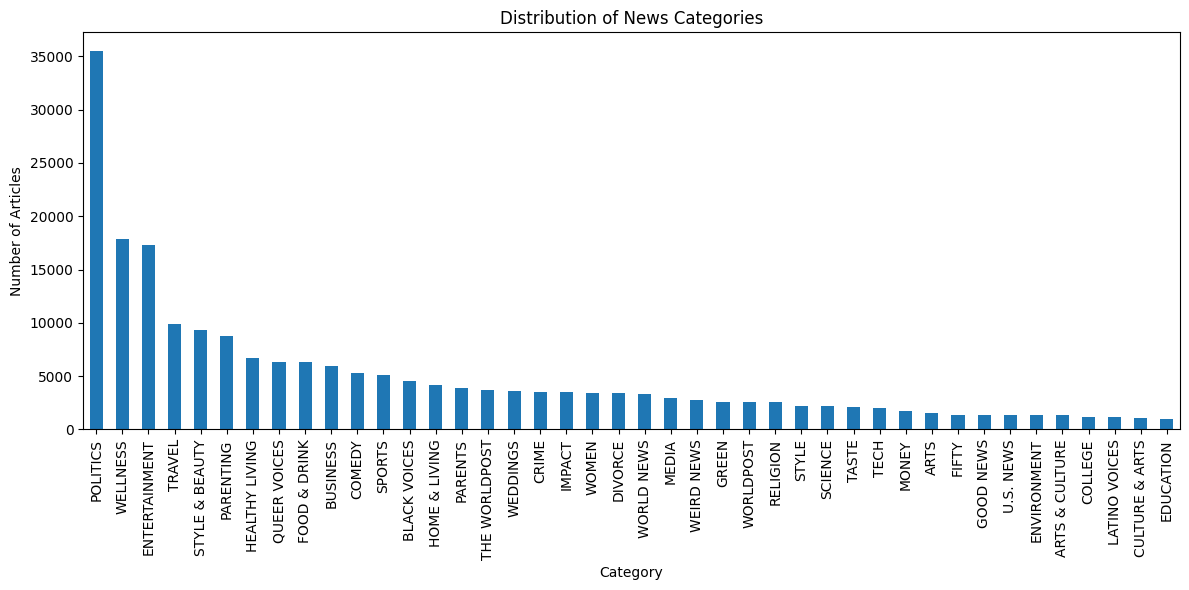

In [6]:
import matplotlib.pyplot as plt
# Count unique categories
category_counts = df['category'].value_counts()

# Plot the category distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar')
plt.title('Distribution of News Categories')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [7]:
# Check for dataset quality issues
print("=" * 50)
print("DATASET QUALITY REPORT")
print("=" * 50)

# 1. Check for duplicate rows
print("\n1. DUPLICATE ROWS:")
duplicate_count = df.duplicated().sum()
print(f"   Total duplicate rows: {duplicate_count}")

# 2. Check for null/missing values
# print("\n2. MISSING VALUES:")
# null_counts = df.isnull().sum()
# print(null_counts)
# print(f"\n   Total missing values: {df.isnull().sum().sum()}")

# 3. Check for duplicate headlines
# print("\n3. DUPLICATE HEADLINES:")
# duplicate_headlines = df['headline'].duplicated().sum()
# print(f"   Total duplicate headlines: {duplicate_headlines}")

# 4. Basic dataset statistics
# print("\n4. DATASET STATISTICS:")
# print(f"   Total rows: {len(df)}")
# print(f"   Total columns: {len(df.columns)}")
# print(f"   Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# 5. Category distribution
# print("\n5. CATEGORY DISTRIBUTION:")
# print(df['category'].value_counts())

print("\n6. CATEGORY VALUES")
print(df['category'].unique())

# 6. Date range
print("\n7. DATE RANGE:")
print(f"   Earliest date: {df['date'].min()}")
print(f"   Latest date: {df['date'].max()}")

print("\n" + "=" * 50)

DATASET QUALITY REPORT

1. DUPLICATE ROWS:
   Total duplicate rows: 0

6. CATEGORY VALUES
['U.S. NEWS' 'COMEDY' 'PARENTING' 'WORLD NEWS' 'CULTURE & ARTS' 'TECH'
 'SPORTS' 'ENTERTAINMENT' 'POLITICS' 'WEIRD NEWS' 'ENVIRONMENT'
 'EDUCATION' 'CRIME' 'SCIENCE' 'WELLNESS' 'BUSINESS' 'STYLE & BEAUTY'
 'FOOD & DRINK' 'MEDIA' 'QUEER VOICES' 'HOME & LIVING' 'WOMEN'
 'BLACK VOICES' 'TRAVEL' 'MONEY' 'RELIGION' 'LATINO VOICES' 'IMPACT'
 'WEDDINGS' 'COLLEGE' 'PARENTS' 'ARTS & CULTURE' 'STYLE' 'GREEN' 'TASTE'
 'HEALTHY LIVING' 'THE WORLDPOST' 'GOOD NEWS' 'WORLDPOST' 'FIFTY' 'ARTS'
 'DIVORCE']

7. DATE RANGE:
   Earliest date: 2012-01-28 00:00:00
   Latest date: 2022-09-23 00:00:00



In [8]:
categories_to_keep = ['WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY', 'PARENTING', 'FOOD & DRINK', 'POLITICS']

# Create a mapping dictionary for encoding
category_mapping = {
    'WELLNESS': 0,
    'ENTERTAINMENT': 1,
    'TRAVEL': 2,
    'STYLE & BEAUTY': 3,
    'PARENTING': 4,
    'FOOD & DRINK': 5,
    'POLITICS': 6
}

# Fix the filtering - use .keys() method
df = df[df['category'].isin(category_mapping.keys())]

# Apply the encoding to the category column
df['category'] = df['category'].map(category_mapping)

print(df['category'].value_counts())

category
6    35475
0    17870
1    17319
2     9873
3     9323
4     8723
5     6330
Name: count, dtype: int64


In [9]:
# Balance the dataset by limiting each category to the minimum count
min_samples = df['category'].value_counts().min()
print(f"Minimum samples per category: {min_samples}")

# Sample the same number of rows from each category
df_balanced = df.groupby('category', group_keys=False).apply(
    lambda x: x.sample(n=min_samples, random_state=42)
)

# Reset index and shuffle
df_balanced = df_balanced.reset_index(drop=True)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Update df with balanced dataset
df = df_balanced

print(f"\nBalanced dataset shape: {df.shape}")
print(f"\nCategory distribution after balancing:")
print(df['category'].value_counts().sort_index())

Minimum samples per category: 6330

Balanced dataset shape: (44310, 7)

Category distribution after balancing:
category
0    6330
1    6330
2    6330
3    6330
4    6330
5    6330
6    6330
Name: count, dtype: int64


C:\Users\Risya\AppData\Local\Temp\ipykernel_24932\4130417362.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('category', group_keys=False).apply(


In [10]:
# Mengubah teks menjadi vector (Tokenizing)
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_headline'])

sequences = tokenizer.texts_to_sequences(df['cleaned_headline'])

MAX_LEN = 100

X_padded = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, df['category'], test_size=0.2, random_state=42)

c:\Users\Risya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Average sequence length: 6.33
Median sequence length: 6.00
Max sequence length: 27
95th percentile: 10.00
99th percentile: 12.00


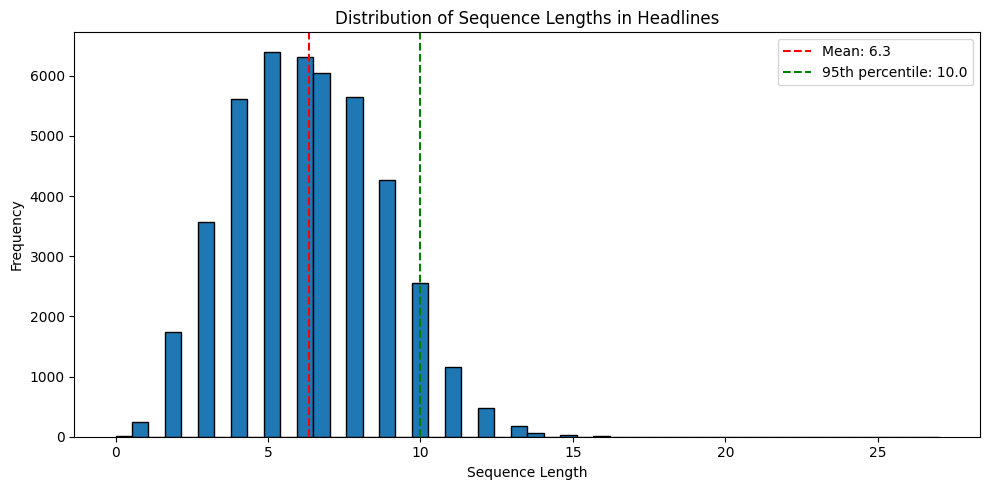

In [11]:
import matplotlib.pyplot as plt

sequence_lengths = [len(seq) for seq in sequences]
print(f"Average sequence length: {np.mean(sequence_lengths):.2f}")
print(f"Median sequence length: {np.median(sequence_lengths):.2f}")
print(f"Max sequence length: {max(sequence_lengths)}")
print(f"95th percentile: {np.percentile(sequence_lengths, 95):.2f}")
print(f"99th percentile: {np.percentile(sequence_lengths, 99):.2f}")

plt.figure(figsize=(10, 5))
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.axvline(np.mean(sequence_lengths), color='r', linestyle='--', label=f'Mean: {np.mean(sequence_lengths):.1f}')
plt.axvline(np.percentile(sequence_lengths, 95), color='g', linestyle='--', label=f'95th percentile: {np.percentile(sequence_lengths, 95):.1f}')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths in Headlines')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# IMPROVED: Re-tokenize with optimal MAX_LEN
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# Use the same tokenizer but with better MAX_LEN
OPTIMAL_MAX_LEN = 15  # Covers 99% of headlines instead of wasteful 200

X_padded_improved = pad_sequences(sequences, maxlen=OPTIMAL_MAX_LEN, padding='post', truncating='post')

# Split the data
from sklearn.model_selection import train_test_split
X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_padded_improved, df['category'], test_size=0.2, random_state=42, stratify=df['category']
)

print(f"Training set shape: {X_train_improved.shape}")
print(f"Test set shape: {X_test_improved.shape}")
print(f"Training set distribution:\n{pd.Series(y_train_improved).value_counts().sort_index()}")
print(f"\nTest set distribution:\n{pd.Series(y_test_improved).value_counts().sort_index()}")

Training set shape: (35448, 15)
Test set shape: (8862, 15)
Training set distribution:
category
0    5064
1    5064
2    5064
3    5064
4    5064
5    5064
6    5064
Name: count, dtype: int64

Test set distribution:
category
0    1266
1    1266
2    1266
3    1266
4    1266
5    1266
6    1266
Name: count, dtype: int64


In [15]:
print("Final Class Distribution:")
print(df['category'].value_counts())

output_filename = '../News_Category_Final.csv'
df.to_csv(output_filename, index=False)

print(f"Dataset saved successfully as {output_filename}")

Final Class Distribution:
category
6    6330
0    6330
3    6330
1    6330
2    6330
4    6330
5    6330
Name: count, dtype: int64
Dataset saved successfully as ../News_Category_Final.csv


In [31]:
# Save category mapping
import json

reverse_mapping = {
    0: 'WELLNESS',
    1: 'ENTERTAINMENT', 
    2: 'TRAVEL',
    3: 'STYLE & BEAUTY',
    4: 'PARENTING',
    5: 'FOOD & DRINK',
    6: 'POLITICS'
}

with open('../category_mapping.json', 'w') as f:
    json.dump(reverse_mapping, f)

print('\nCategory mapping saved to category_mapping.json')



Category mapping saved to category_mapping.json
